In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import  ElasticNet
from sklearn.linear_model import  Ridge
from sklearn.model_selection import cross_val_score
import  statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib
from sklearn.decomposition import  PCA
from sklearn.cluster import  KMeans

%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/Ankita/Documents/Yash/Project Data/Cali Housing Prices/housing.csv")

print('the number of rows and columns are ',df.shape)

the number of rows and columns are  (20640, 10)


In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.total_bedrooms.describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

Text(0, 0.5, 'frequency')

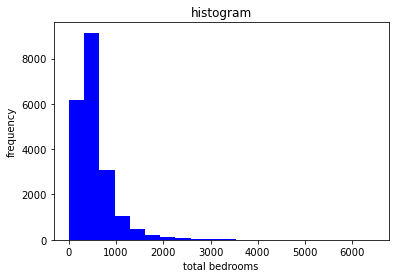

In [7]:

plt.hist(df[df['total_bedrooms'].notnull()]["total_bedrooms"],color='blue',bins=20)
plt.title('histogram')
(df['total_bedrooms']>4000).sum()
plt.xlabel('total bedrooms')
plt.ylabel('frequency')

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

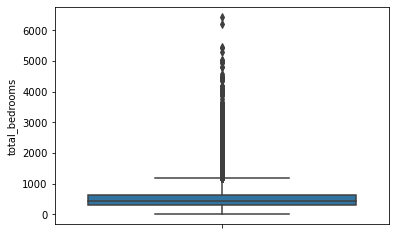

In [8]:
sns.boxplot(y='total_bedrooms',data=df)
plt.plot

In [9]:
#calculating the median for total_bedrooms based  on the categories of ocean_proximity

def category_median(x):
    """this function will fill the missing values of total_bedrooms based upon categories of ocean_proximity"""
    column_ocean_proximity=x['ocean_proximity'].unique()
    for i in column_ocean_proximity:
        median=x[x['ocean_proximity']==i]['total_bedrooms'].median()
        x.loc[x['ocean_proximity']==i,'total_bedrooms'] =  x[x['ocean_proximity']==i]['total_bedrooms'].fillna(median)
category_median(df)

In [10]:
print(df.isnull().sum())

##now we dont have any missing values

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [11]:
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [12]:
##EDA
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.852229,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.390765,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


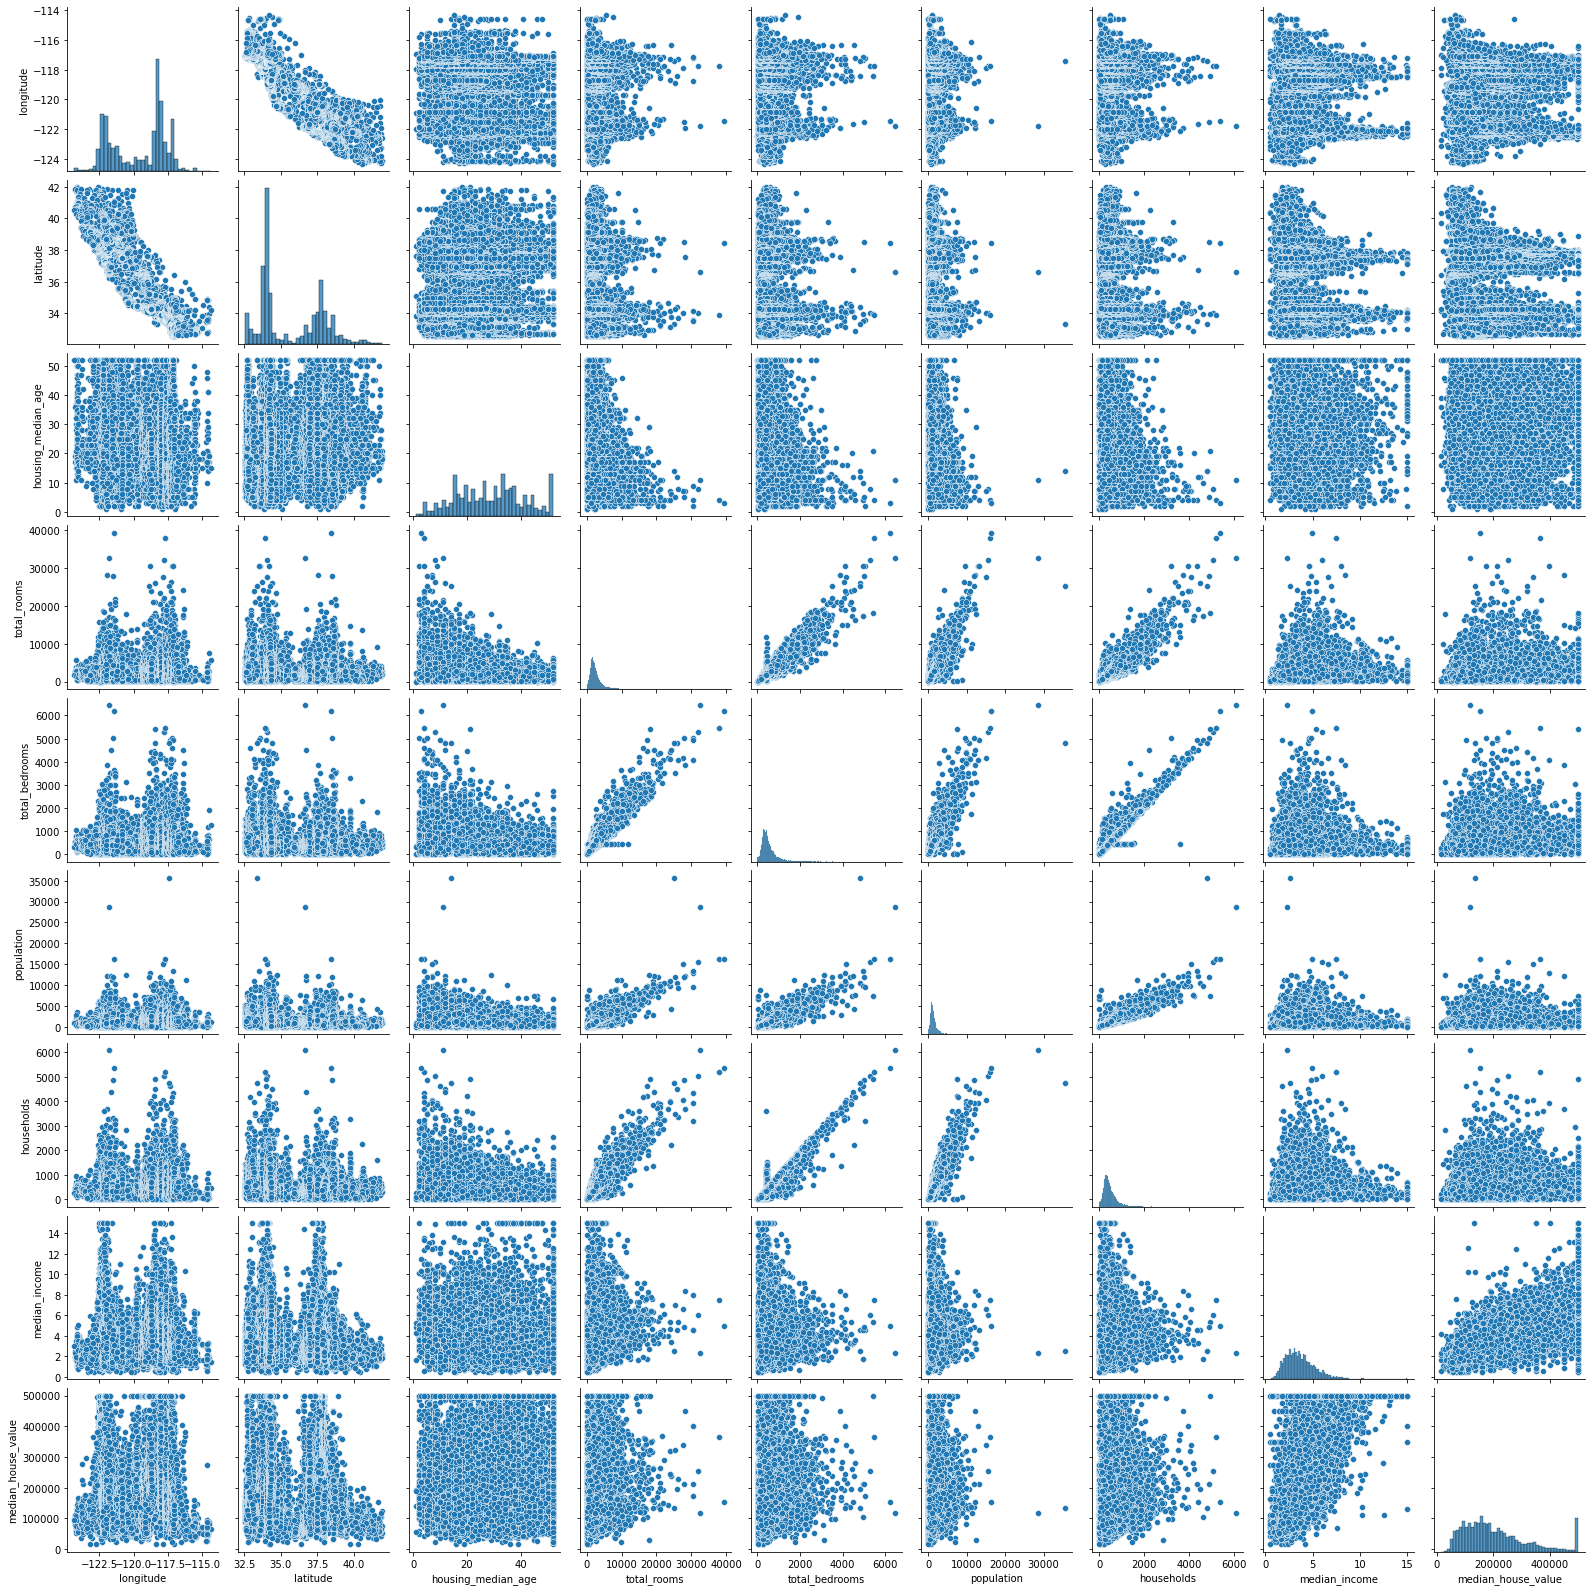

In [13]:
sns.pairplot(df)

C:\Users\Ankita\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


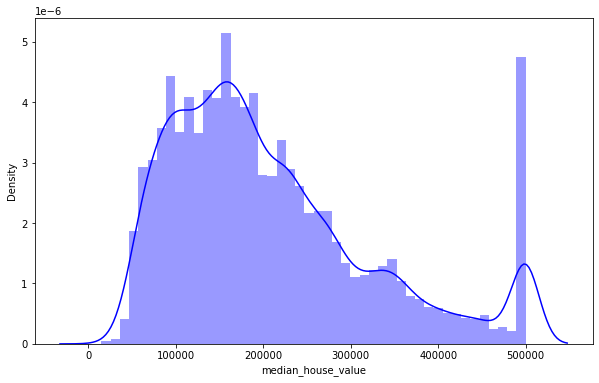

In [14]:
#The area where median price frequency for >= 500000 is more and could be an outlier or wrong data

plt.figure(figsize=(10,6))
sns.distplot(df['median_house_value'],color='blue')
plt.show()

[]

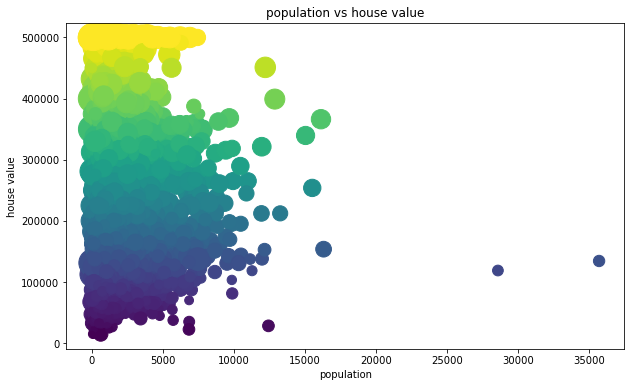

In [15]:
plt.figure(figsize=(10,6))

plt.scatter(df['population'],df['median_house_value'],c=df['median_house_value'],s=df['median_income']*50)
plt.colorbar
plt.title('population vs house value' )
plt.xlabel('population')
plt.ylabel('house value')
plt.plot()

In [ ]:
##Next we will remove the outliers

In [16]:
df[df['median_house_value']>450000]['median_house_value'].value_counts().head()

500001.0    965
500000.0     27
475000.0      8
483300.0      6
466700.0      4
Name: median_house_value, dtype: int64

In [17]:
df=df.loc[df['median_house_value']<500001,:]

In [18]:
df=df[df['population']<25000]

C:\Users\Ankita\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


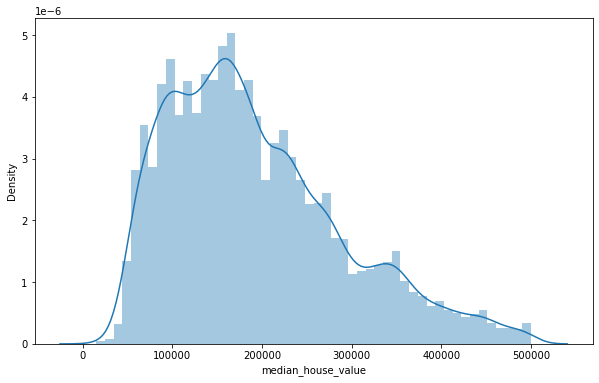

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(df['median_house_value'])
plt.show()

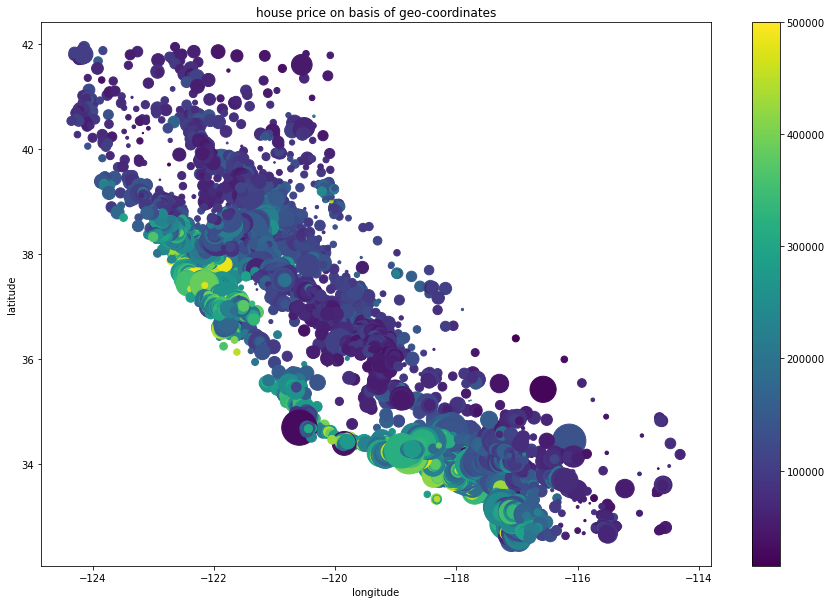

In [20]:
plt.figure(figsize=(15,10))
plt.scatter(df['longitude'],df['latitude'],c=df['median_house_value'],s=df['population']/10,cmap='viridis')
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('house price on basis of geo-coordinates')
plt.show()

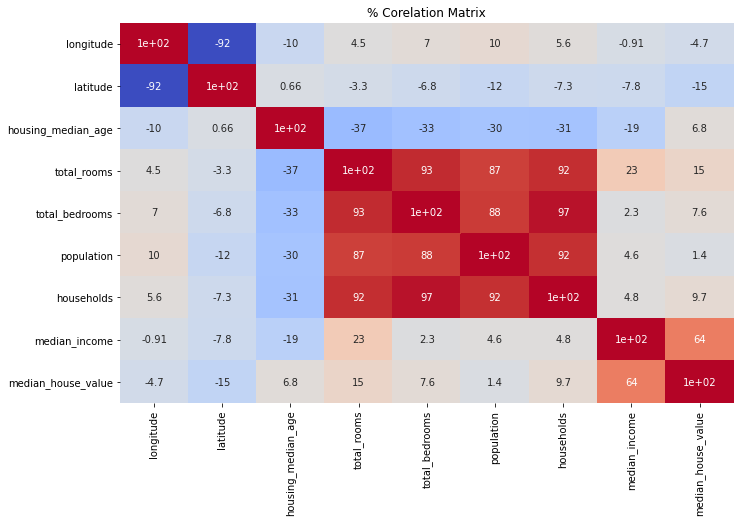

In [21]:
#correlation matrix
plt.figure(figsize=(11,7))
sns.heatmap(cbar=False,annot=True,data=df.corr()*100,cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()

[]

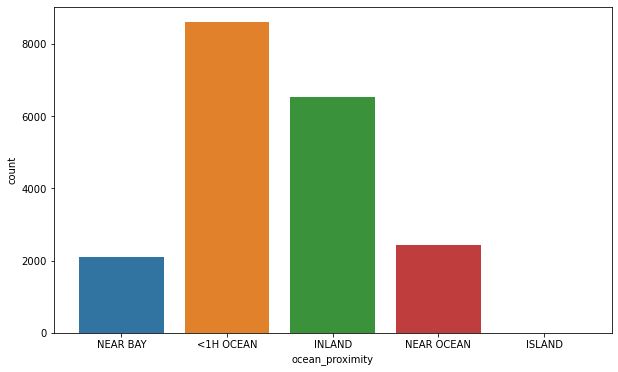

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='ocean_proximity')
plt.plot()

[]

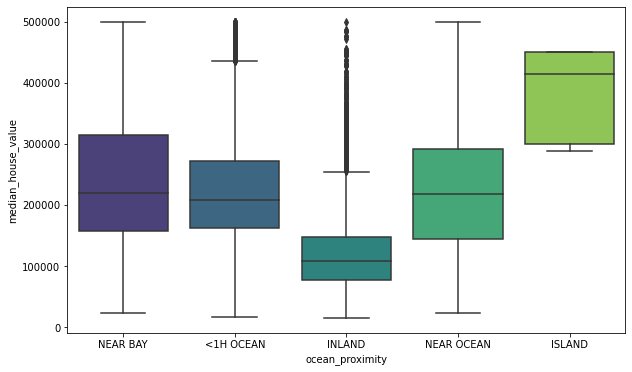

In [23]:
##boxplot figure for house value based on ocean proximity categories
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='ocean_proximity',y='median_house_value',palette='viridis')
plt.plot()

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

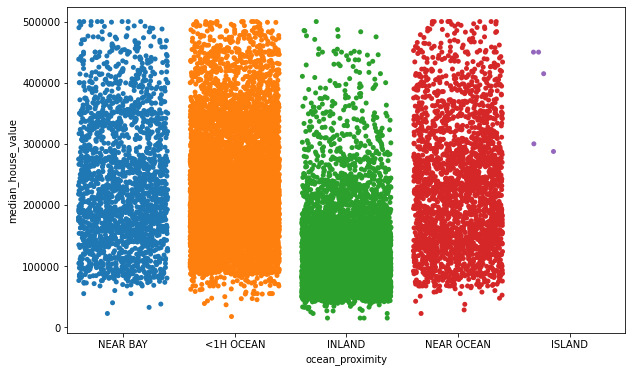

In [27]:
plt.figure(figsize=(10,6))

sns.stripplot(data=df,x='ocean_proximity',y='median_house_value',jitter=0.4)

In [ ]:
##preprocessing the data

In [16]:
# converting ocean_proximity to dummies
df=pd.concat([pd.get_dummies(df['ocean_proximity'],drop_first=True),df],axis=1).drop('ocean_proximity',axis=1)
df['income per working population']=df['median_income']/(df['population']-df['households'])
df['bed per house']=df['total_bedrooms']/df['total_rooms']
df['h/p']=df['households']/df['population']

In [17]:
def type_building(x):
    if x<=10:
        return "new"
    elif x<=30:
        return 'mid old'
    else:
        return 'old'
df=pd.concat([df,pd.get_dummies(df['housing_median_age'].apply(type_building),drop_first=True)],axis=1)

In [18]:
x=df.drop('median_house_value',axis=1).values
y=df['median_house_value'].values

In [19]:
##training and testing sampling

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [20]:
##Normalising data

from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
xtrain=ms.fit_transform(xtrain)
xtest=ms.transform(xtest)

In [21]:
##Visualising data using PCA

def c_variance(x):
    total=0
    clist=[]
    for i in np.arange(0,xtrain.shape[1]):
        p=PCA(n_components=i+1)
        p.fit(x)
        total=total+p.explained_variance_ratio_[i]
        clist.append(total)
        
    return clist
x_train_variance=list(map(lambda x:x*100,c_variance(xtrain)))

Text(0.5, 1.0, 'comulative variance ratio of p.c.a components')

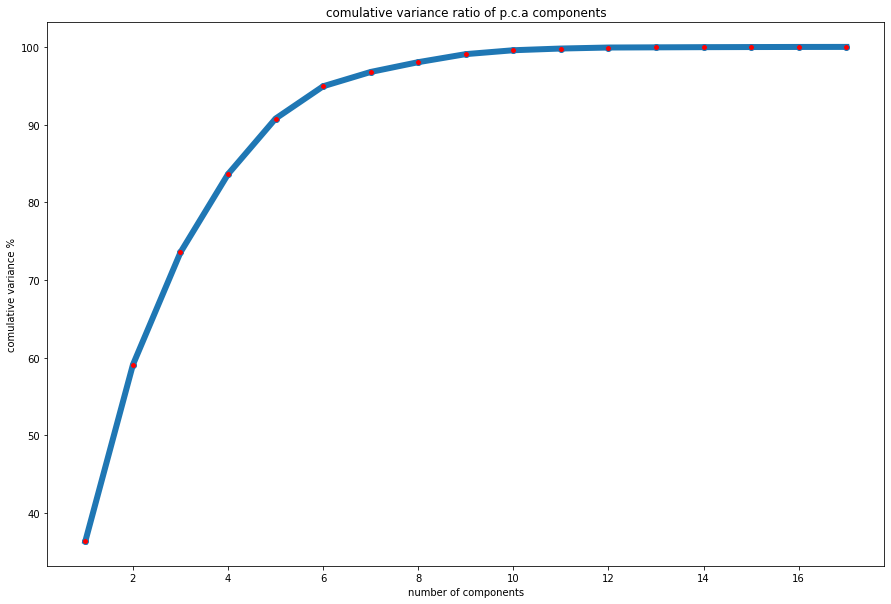

In [22]:
##Variance Curve

plt.figure(figsize=(15,10))
plt.plot(np.arange(1,xtrain.shape[1]+1),x_train_variance,marker='o',markerfacecolor='red',lw=6)
plt.xlabel('number of components')
plt.ylabel('comulative variance %')
plt.title('comulative variance ratio of p.c.a components')

C:\Users\Ankita\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


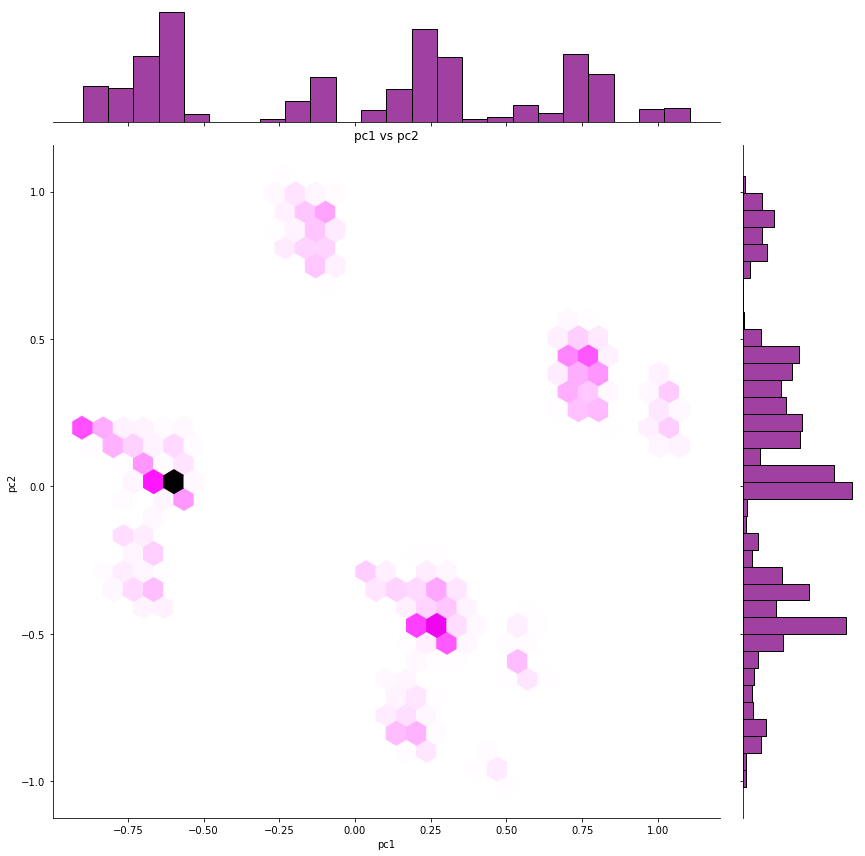

In [23]:
pca=PCA(n_components=2)
pca.fit(xtrain)
sns.jointplot(data={'pc1':pca.fit_transform(xtrain)[:,0],'pc2':pca.fit_transform(xtrain)[:,1]},x='pc1',y='pc2',size=12,kind='hex',color='purple')
plt.title('pc1 vs pc2')
plt.show()

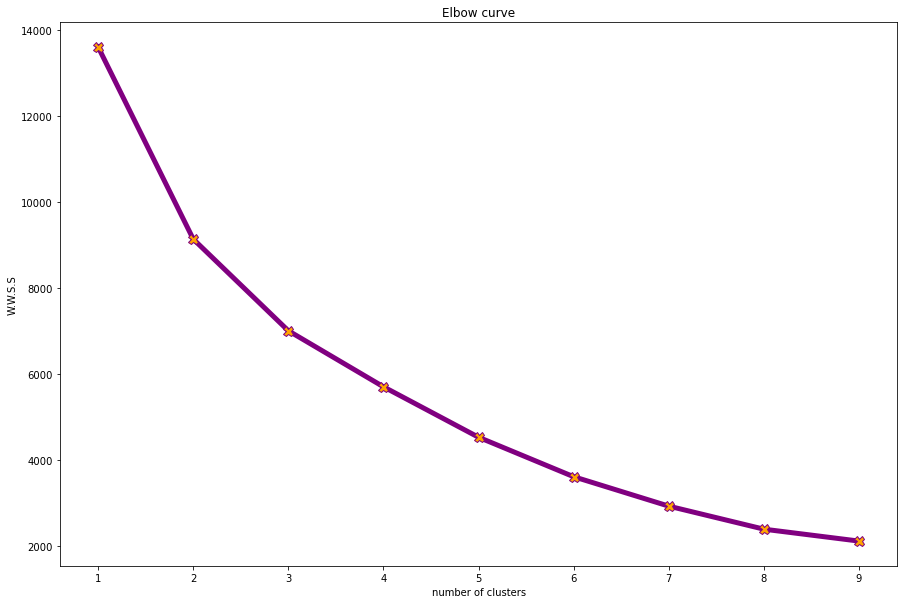

In [24]:
p_train=pca.fit_transform(xtrain)

best=[]
for i in range(1,10):
    k=KMeans(n_clusters=i)
    k.fit(xtrain)
    best.append(k.inertia_)

    
plt.figure(figsize=(15,10))
plt.plot(np.arange(1,len(best)+1),best,marker='X',markerfacecolor='orange',markersize=10,lw=5,color='purple')
plt.title('Elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('W.W.S.S')
plt.show()

In [25]:
k=KMeans(n_clusters=4)
kpred=k.fit_predict(xtrain)

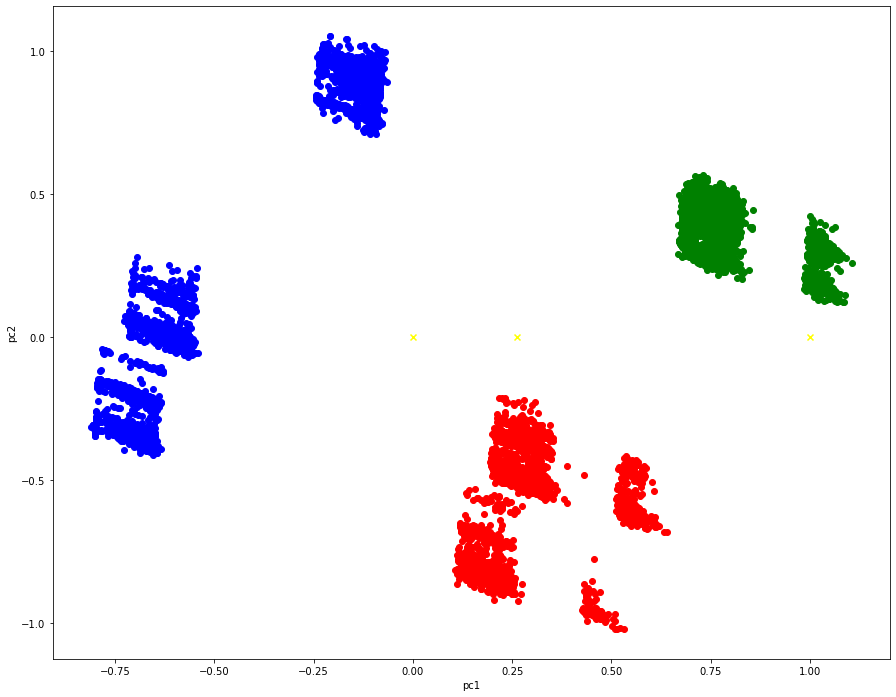

In [26]:
plt.figure(figsize=(15,12))
color=['red','green','blue','pink']
for i in range(3):
    plt.scatter(p_train[kpred==i][:,0],p_train[kpred==i][:,1],c=color[i])
    plt.scatter(k.cluster_centers_[i,0],k.cluster_centers_[i,1],c='yellow',marker='x')
    plt.xlabel('pc1')
    plt.ylabel('pc2')

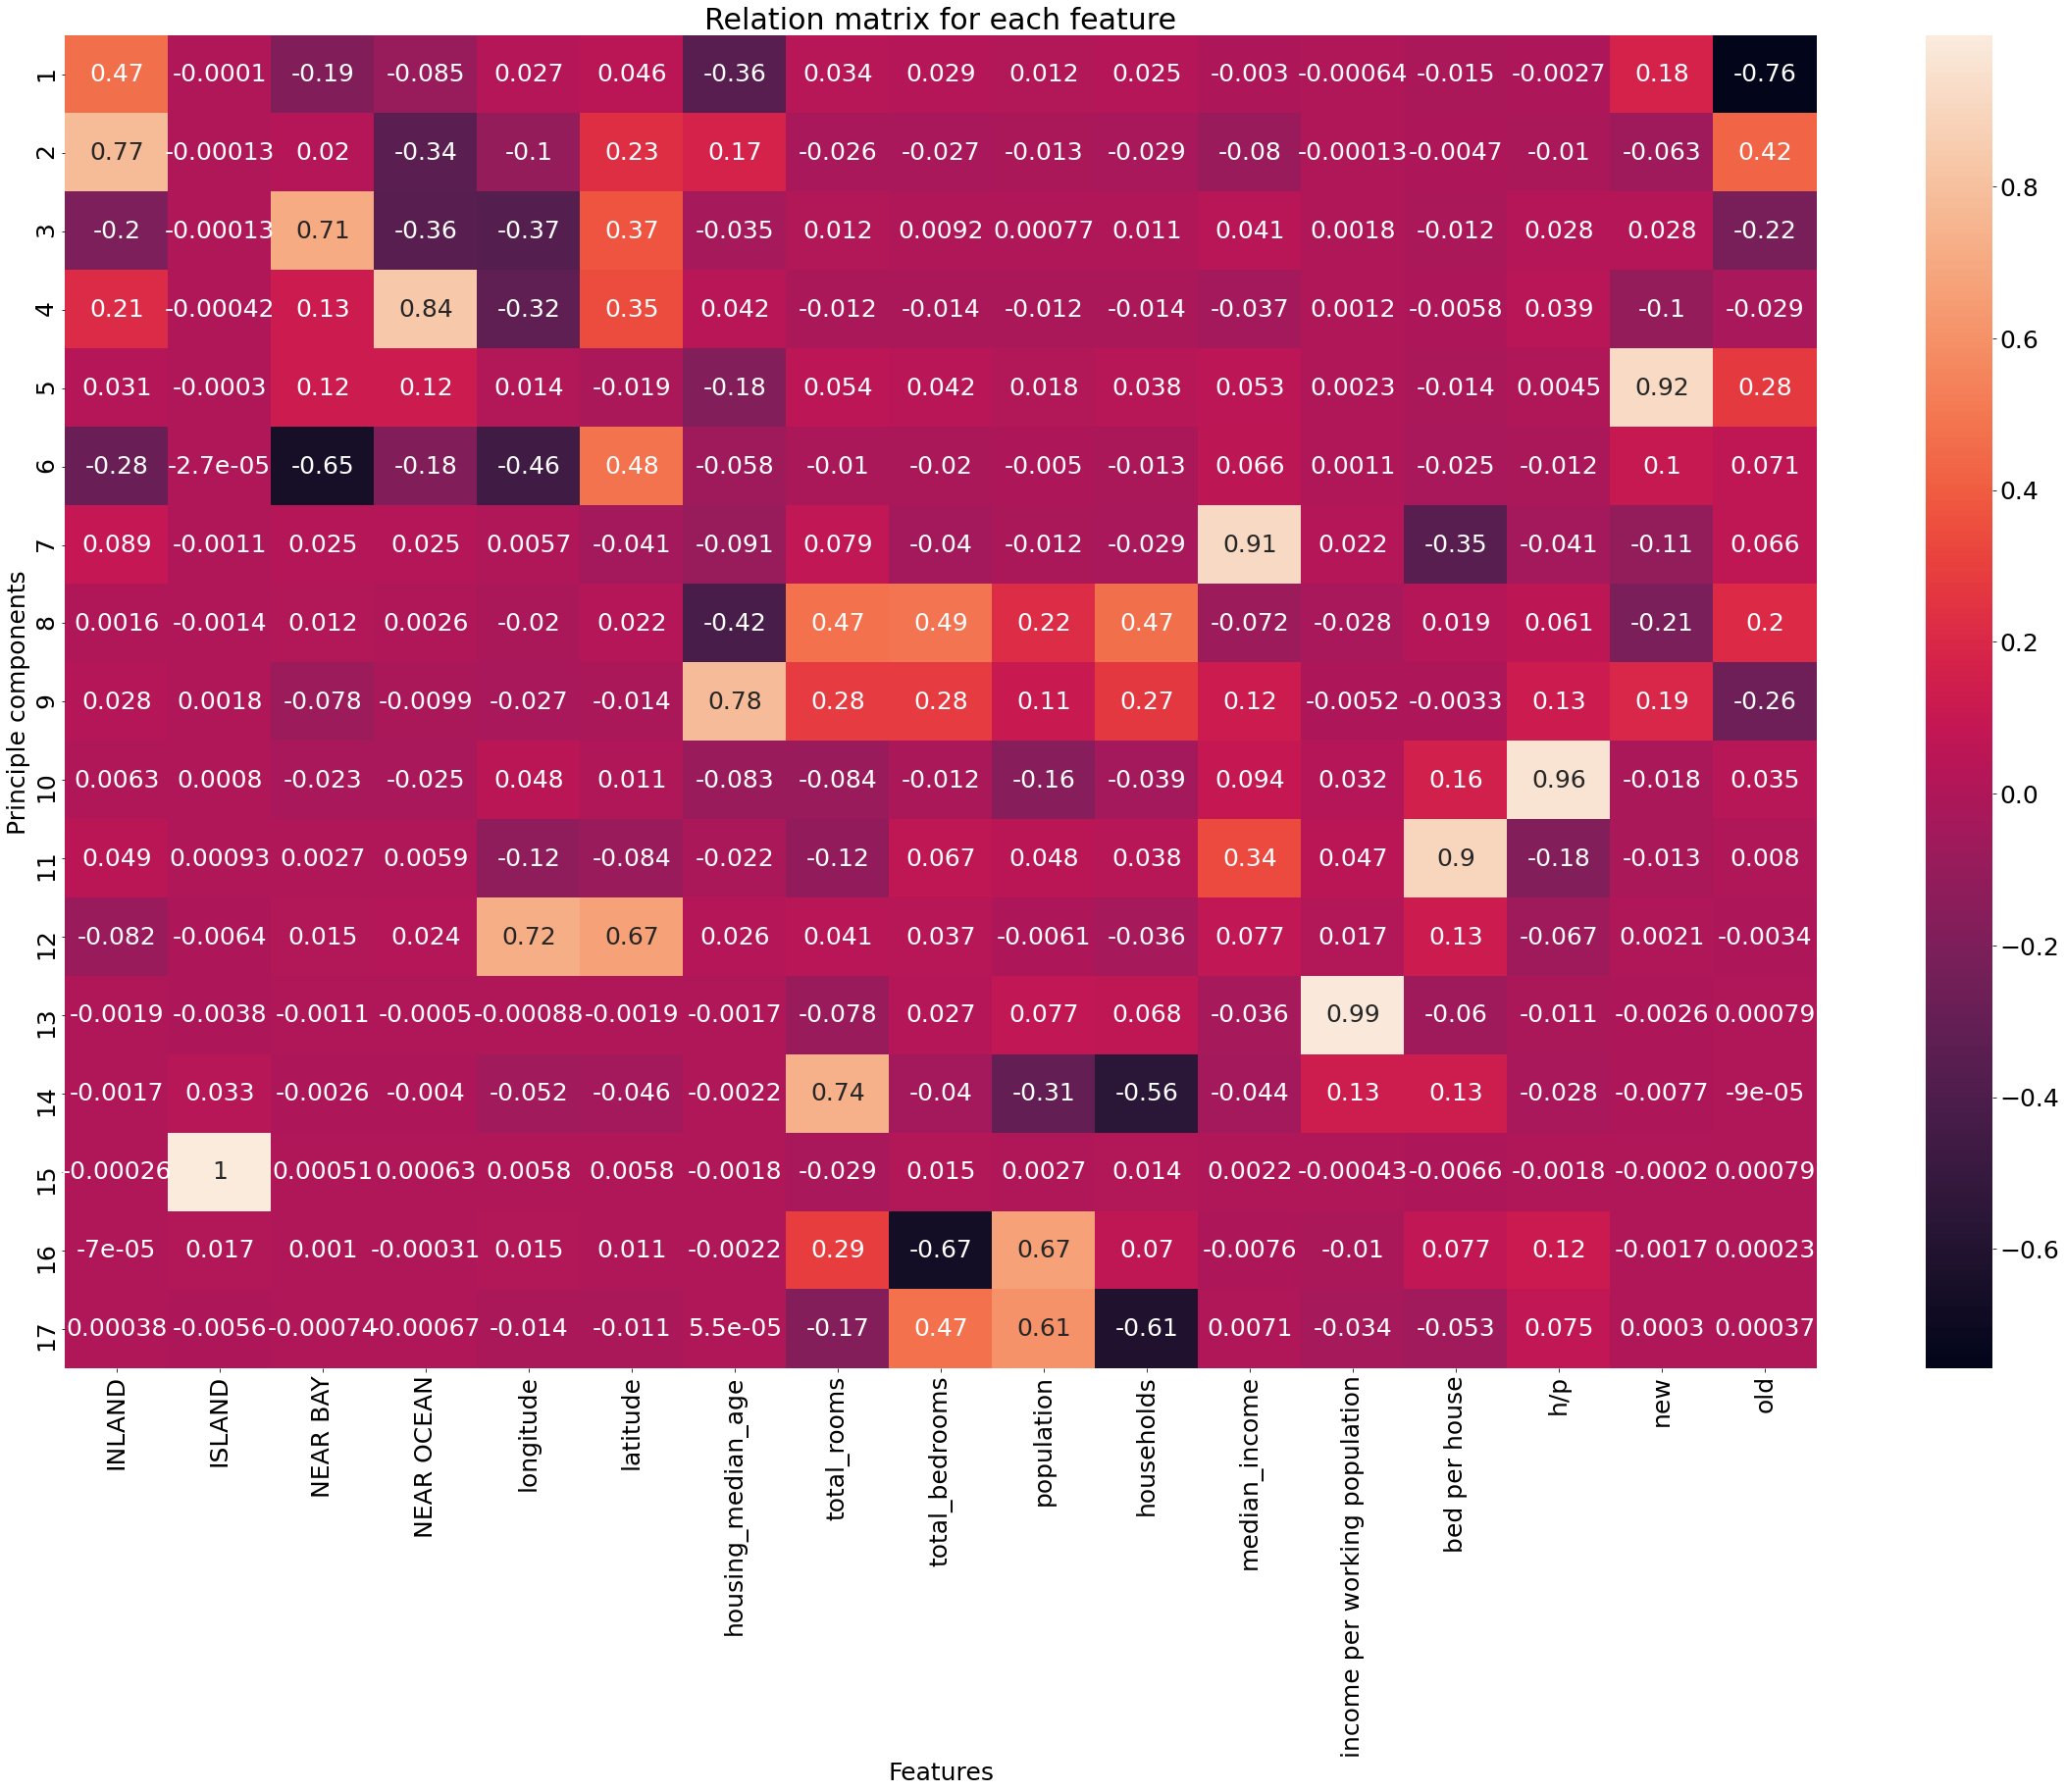

In [27]:
matplotlib.rcParams.update({'font.size': 25})
pca=PCA(n_components=None)
pca.fit(xtrain)
plt.figure(figsize=(40,25))
sns.heatmap(pca.components_,annot=True,xticklabels=df.drop('median_house_value',axis=1).columns,yticklabels=[str(i) for i in range(1,len(df.columns))])
plt.xlabel('Features')
plt.ylabel('Principle components')
plt.title('Relation matrix for each feature')
plt.show()
matplotlib.rcParams.update({'font.size': 12})

In [ ]:
##Modelling:

In [30]:
def regresssor_model(x,y,estimator):
   
    regressor=estimator()
    regressor.fit(x,y)
    lr_rmse=np.sqrt(mean_squared_error(y,regressor.predict(x)))
    cv_regressor=cross_val_score(cv=10,X=x,y=y,estimator=regressor,scoring='r2')
    print('The cross validated accuracy  - '+str(100*cv_regressor.mean()))
    print('The corss validated variance is - '+str(100*cv_regressor.std()))
    return regressor

def evaluate(ypred,ytest,regressor):
    plt.figure(figsize=(15,8))
    plt.xlabel('(ytest) - (ypred)')
    plt.ylabel('frequency')
    plt.title('residual plot')
    plt.hist(ytest-ypred)
    print("root mean squared error for test data   is "+str(np.sqrt(mean_squared_error(ytest,ypred))))
    plt.show()
# plt.show()


#polynomial regression with all features
def to_poly(degree,xtrain,xtest):
    poly=PolynomialFeatures(degree=degree)
    X=poly.fit_transform(xtrain)
    x=poly.fit_transform(xtest)
    return (X,x)

Linear regression with most co related features
The cross validated accuracy  - 47.979107950753
The corss validated variance is - 2.8779594084747226
root mean squared error for test data   is 85124.53624841146


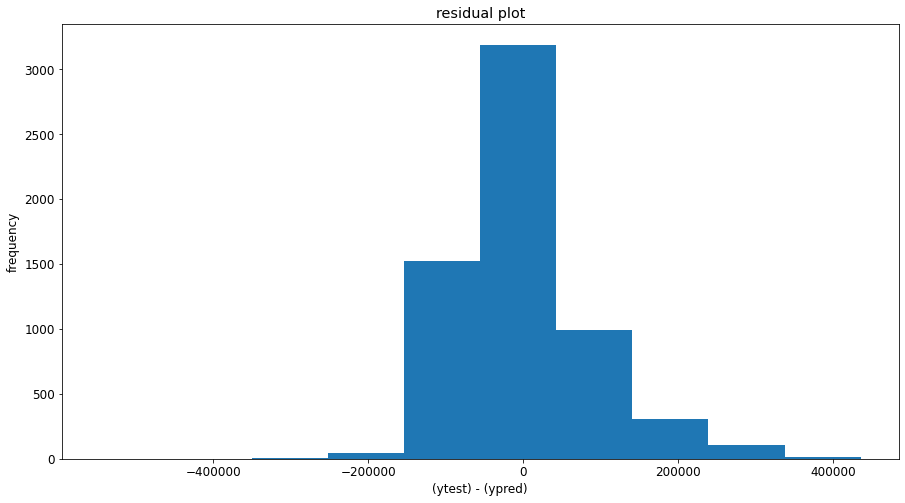

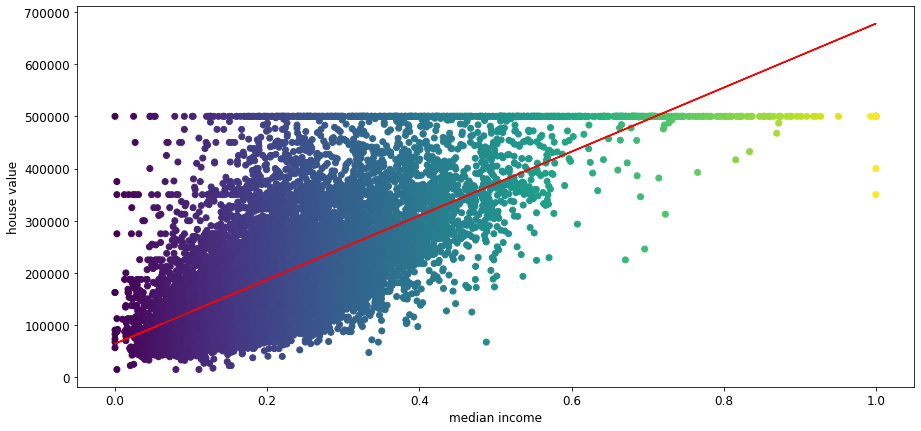

In [31]:
print('Linear regression with most co related features')
l=regresssor_model(xtrain[:,[11]],ytrain,LinearRegression)
evaluate(l.predict(xtest[:,[11]]),ytest,l)
plt.figure(figsize=(15,7))
plt.scatter(xtrain[:,11],ytrain,c=xtrain[:,11])
plt.plot(xtrain[:,11],l.predict(xtrain[:,11:12]),color='red')
plt.xlabel('median income')
plt.ylabel('house value')
plt.show()

Linear regression with all features
The cross validated accuracy  - 68.0205901315986
The corss validated variance is - 2.0928513569006455
root mean squared error for test data   is 66937.29212442532


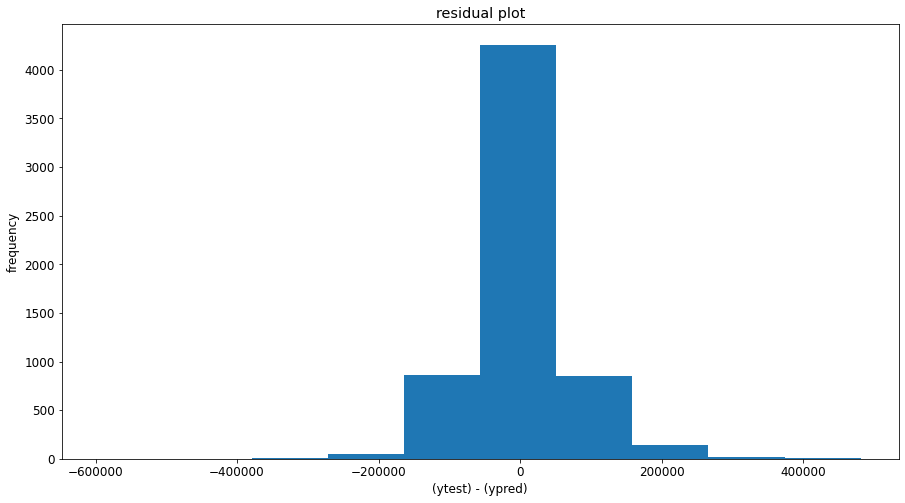

In [32]:
print('Linear regression with all features')
l=regresssor_model(xtrain,ytrain,LinearRegression)
evaluate(l.predict(xtest),ytest,l)

The cross validated accuracy  - 48.35006816088615
The corss validated variance is - 3.035659885548494
root mean squared error for test data   is 84627.6386472762


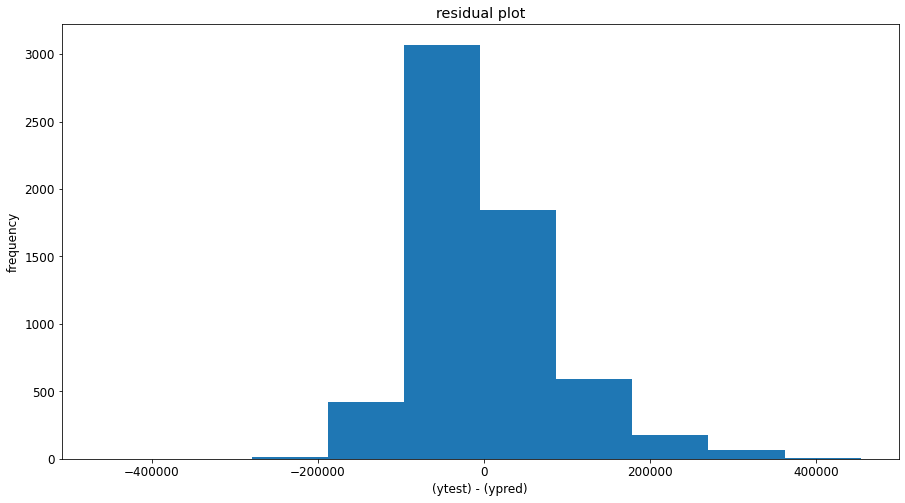

In [33]:
##Polynomial regression with most corelated features

xtrain_poly,xtest_poly=to_poly(2,xtrain[:,11:12],xtest[:,11:12])
l=regresssor_model(xtrain_poly,ytrain,LinearRegression)
evaluate(l.predict(xtest_poly),ytest,l)

The cross validated accuracy  - -6.905587695554954e+18
The corss validated variance is - 1.4208276394726388e+19
root mean squared error for test data   is 11713295644827.768


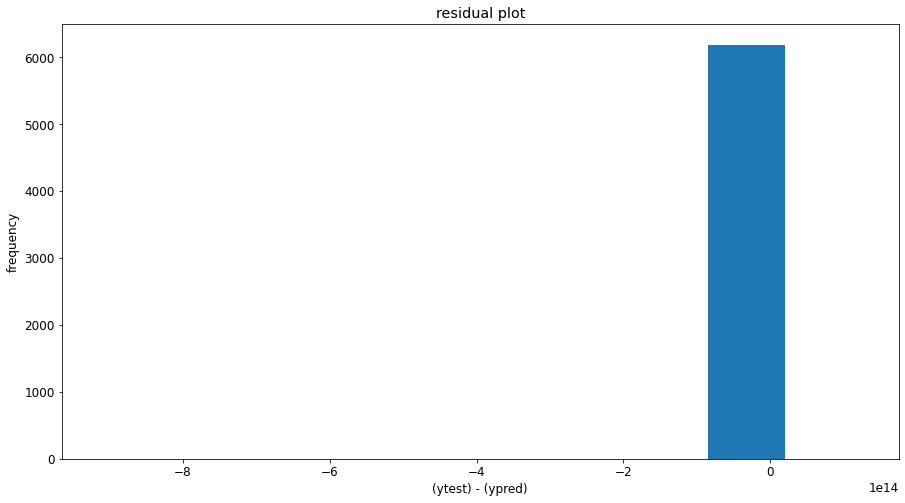

In [34]:
##Polynomial regression with all features

xtrain_poly,xtest_poly=to_poly(3,xtrain,xtest)
l=regresssor_model(xtrain_poly,ytrain,LinearRegression)
evaluate(l.predict(xtest_poly),ytest,l)

In [42]:
##CART TREES 

dt=regresssor_model(xtrain,ytrain,DecisionTreeRegressor)
dt.fit(xtrain,ytrain)
print('mean squared errror is',end='\t-')
np.sqrt(mean_squared_error(ytest,dt.predict(xtest)))

The cross validated accuracy  - 63.31542656404478
The corss validated variance is - 3.5080883065306705
mean squared errror is	-

69774.47903765457

In [43]:
##Cross Validation

cv=cross_val_score(dt,xtrain,ytrain,scoring='r2',cv=10)
cv.std()
cv.mean()

0.6305050434102663

In [44]:
#-->Esemble Learning
#Random forest
rg=RandomForestRegressor(n_estimators=30)
rg.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=30)

In [45]:
#RMSE
print(np.sqrt(mean_squared_error(ytest,rg.predict(xtest))))

51983.16886332947


In [46]:
#R Squared
print(rg.score(xtest,ytest))

0.7973165868075903


(array([2.000e+00, 8.000e+00, 4.000e+01, 2.480e+02, 2.989e+03, 2.500e+03,
        3.000e+02, 7.200e+01, 2.200e+01, 1.100e+01]),
 array([-368701.        , -295455.56666667, -222210.13333333,
        -148964.7       ,  -75719.26666667,   -2473.83333333,
          70771.6       ,  144017.03333333,  217262.46666667,
         290507.9       ,  363753.33333333]),
 <BarContainer object of 10 artists>)

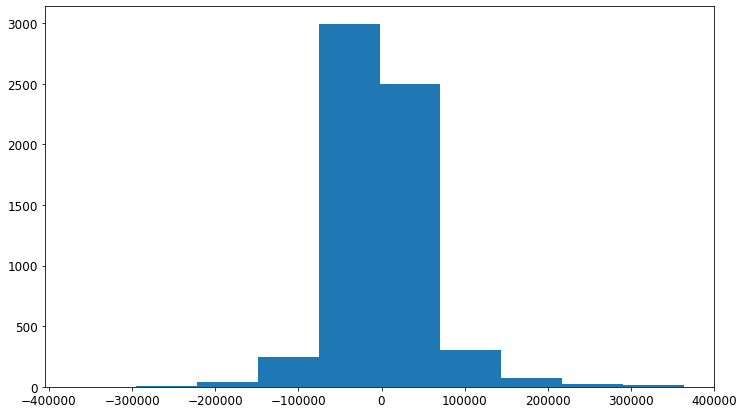

In [47]:
plt.figure(figsize=(12,7))
plt.hist(ytest-rg.predict(xtest))

In [48]:
params=[{
            'n_estimators':[20,30,70,50,100,200,300,400,600,650,630,680],
            'max_depth':[10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,5,10],
            'min_samples_leaf' :[1,2,5,7,10],
            'bootstrap':[True,False],
            'max_features':['sqrt','auto']
            
            
        }
]

In [49]:
##Model with Best HyperParameter
rg=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=70,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=630, n_jobs=1,
           oob_score=False, verbose=0, warm_start=False)
rg.fit(xtrain,ytrain)
np.sqrt(mean_squared_error(ytest,rg.predict(xtest)))

49972.59652455828

In [50]:
np.sqrt(mean_squared_error(ytest,rg.predict(xtest)))

49972.59652455828

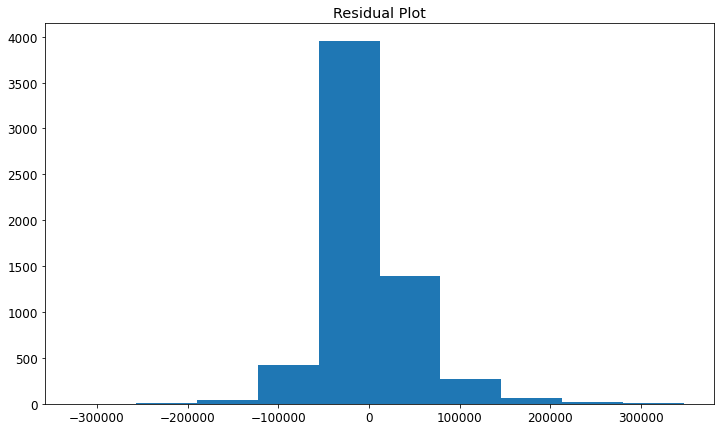

In [51]:
plt.figure(figsize=(12,7))
plt.title('Residual Plot')
plt.hist(ytest-rg.predict(xtest))
plt.show()

In [52]:
##R Squared

rg.score(xtest,ytest)

0.8126919081463069

<AxesSubplot:title={'center':'Feature Importance'}>

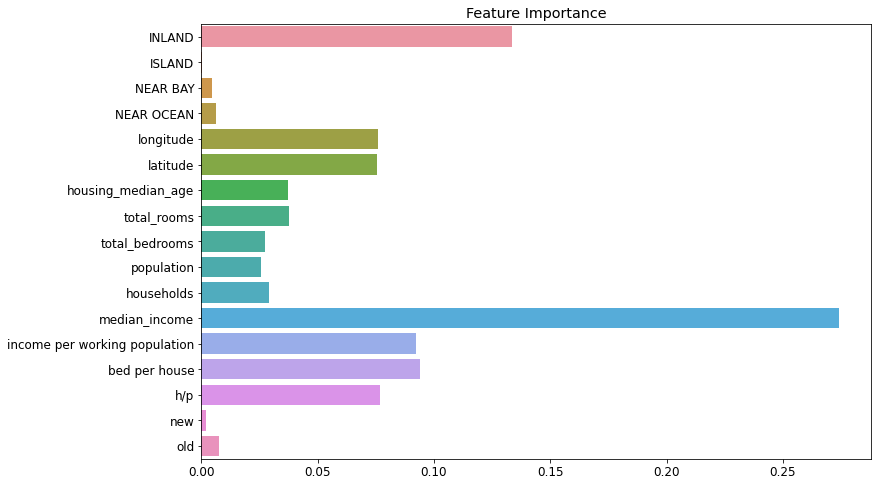

In [53]:
##Best Featureby Random Forest
plt.figure(figsize=(12,8))
plt.title('Feature Importance')

sns.barplot(data={'importance':rg.feature_importances_,'feature':df.columns[df.columns!='median_house_value']},y='feature',x='importance')

rmse value is 48893.91380803334
r squared value is 0.8206909069902675


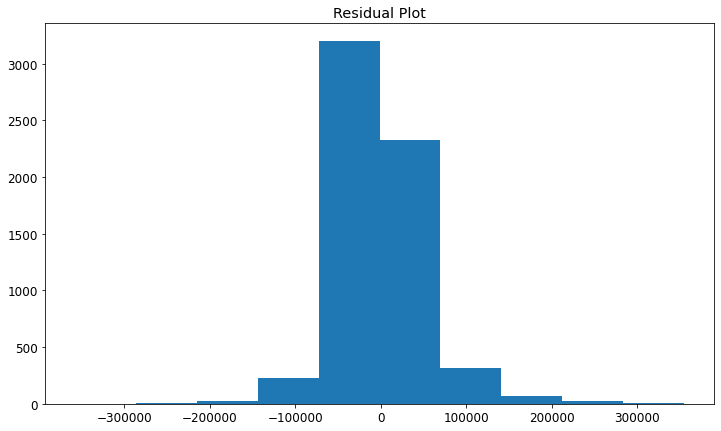

In [54]:
rg=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=100,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=630, n_jobs=1,
           oob_score=False, verbose=0, warm_start=False)
rg.fit(xtrain[:,[0,4,5,6,7,11,12,13,14]],ytrain)
print('rmse value is '+str(np.sqrt(mean_squared_error(ytest,rg.predict(xtest[:,[0,4,5,6,7,11,12,13,14]])))))
print('r squared value is '+str(rg.score(xtest[:,[0,4,5,6,7,11,12,13,14]],ytest)))

plt.figure(figsize=(12,7))
plt.title('Residual Plot')
plt.hist(ytest-rg.predict(xtest[:,[0,4,5,6,7,11,12,13,14]]))
plt.show()

In [55]:
##Fitting Random forest with best feature and visualizing
rg=RandomForestRegressor(n_estimators=400)
rg.fit(xtrain[:,11:12],ytrain)

RandomForestRegressor(n_estimators=400)

In [56]:
x_t=np.arange(min(xtest[:,11]),max(xtest[:,11]),0.005)
x_t=x_t.reshape(len(x_t),1)

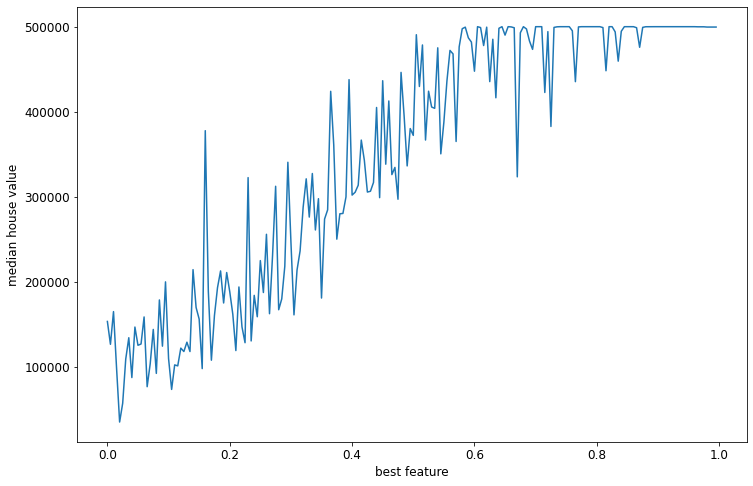

In [57]:
plt.figure(figsize=(12,8))
plt.xlabel("best feature")
plt.ylabel("median house value")
plt.plot(x_t,rg.predict(x_t))

In [ ]:
# As Random Forest has the highest R Squared Value we can conclude it is the best model.